In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import re
from os import path
from PIL import Image
# representing all of categories in a image format
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
# loading daten
df = pd.read_csv('data2.csv')

## EDA: Exploratory Data Analysis
### die Seiten, die am Tag des Scrappings die folgenden Nachrichten enthielten:
* **our website construction** --> 0.087% des donnees du dataset, soit 74 lignes sur 83685. Ceux ci doivent etre retire, bien qu aujourd hui(06.06.2023) elles fonctionnent.
* **welcome page nginx web server successfully instal work configuration require online documentation support refer commercial support available thank nginx** --> 74 Observations sur 83685 au total, qui vont etre aussi retiree.
* **index modify size description cgi** --> 73 Observations sur 83611 au total, qui vont etre retirer bien que le site est operationel aujourd hui.
* **copyright rights reserved privacy policy** --> 67 Observation sur 83538 au total
* **index modified size cgi bin proudly serve litespeed web server port 443** --> 70 Observations sur 83471 au total.
* **index modified size proudly serve litespeed web server port 443** --> 49 Observations sur 83401 au total.
* **diese domain steht zum domain kaufen copyright rights reserved privacy policy** --> 44 Observations sur 83352 au total.
* **account suspendedaccount suspend account suspend contact host provider information** --> 44 Observation sur 83308 au total.
* **functionality site necessary enable javascript instruction enable javascript web browser** --> 43 Observations sur 83264 au total. Ces sites ont des problemes au niveau du server. L ouverture avec un navigateur est impossible, ce qui fait que ni beautifullsoup et Selenium ne peuvent obtenir leur contenus.
* **index modify size description** --> 34 Observations sur 83221 au totals. Impossible d ouvrir les tites webs.
* **domain default pageif see message website available time owner website follow thing occur content website provider suspend page login receive instruction set website plesk plesk host control panel simple secure web server website management tool specially design help specialist manage web dns mail service comprehensive user friendly gui learn plesk developer blog forum knowledge base facebook twitter linkedin test page plesk provide test page use check scripting feature test database connection mail sending click icon test page different script fastcgi php ssi page generate plesk plesk lead webops platform run automate grow application website host business learn** --> 35 Observations sur 83187 au total. Impossible d ouvrir la page.
* **unique opportunity secure available sale proposalsthe owner open offer have naming issue invest brand brand consultant risk willing brand consider upgrade: https://topstats.com, https://hporn.com, https://pornofilmi.com** --> 34 Observations sur 83152 au total. Les fausses informations.
* **found404 foundnginx** --> 29 Observations sur 83118 au total. Le serveur n etais pas fonctionnel le jour du scrapping.
* **gut quelle information suchen thema speziell sachverhalten finden hoffen gesuchte finden information thema webseite domain inhaber dynamisch neriern sedo domain parking programm nutzen seite automatisieren bereitgestellt werbeanzeig seite stehen sedo beziehung privacy policy** --> 31 Observations sur 83089 au total.
* **domain sale domain salethis domain sale** --> 29 Observations sur 83058 au total. Page web indisponible.


### Analyse de Forme:
* variable target:
* ligne et colonnes:
* type de variables:
* Analyse des valeurs manquantes

### Analyse de Fond:
* Visualisation de la target:
* Signification des variables:
* Relation Variable / Target:

In [6]:
df_copy = df.copy()

In [7]:
df_copy = df_copy.drop_duplicates()

In [8]:
df_copy.describe()

,name,category,address,language,words
count,83759,83759,83759,83759,83685
unique,20,246,82201,4,79989
top,Unknown,General Business,https://www.flirt4free.com,en,domain request domain security detailsthis dom...
freq,28604,27352,4,64805,416


In [38]:
#df_copy[df_copy.words.isnull()]

In [10]:
df_new = df_copy.dropna()

In [11]:
df_new.describe()

,name,category,address,language,words
count,83685,83685,83685,83685,83685
unique,20,246,82127,4,79989
top,Unknown,General Business,https://kaotic.com,en,domain request domain security detailsthis dom...
freq,28580,27329,4,64755,416


In [63]:
df_new1 = df_new.copy()
df1 = df_new.copy()

In [49]:
str1 = df1.describe().words.top
#print(str1)
df1[df1['words'] == str1]
df2 = df1.drop(df1.loc[df1['words'] == str1].index)

In [13]:
def c_string(string):
    remove_chr = re.sub(r'[^a-zA-Z0-9\s]', '', string)
    return re.sub(r'\s+', ' ', remove_chr).strip()

def cleaned_word(df):
    for i, w in enumerate(df.words):
        df.words[i] = c_string(w)
    

In [14]:
cleaned_word(df_new1)

In [51]:
cleaned_word(df1)
cleaned_word(df2)

In [56]:
str2 = df2.describe().words.top
print(str2)

our website construction


In [60]:
pro = len(df1[df1['words'] == str2])/df1.shape[0]
print(df1.shape[0])
pro*100

83685


0.08723188146023779

In [92]:
def drop_el(str2, df1, df2):
    df2 = df2.drop(df2.loc[df2['words'] == str2].index)
    df1 = df1.drop(df1.loc[df1['words'] == str2].index)
    return df1, df2
def verif_df(str2, df):
    return df[df['words'] == str2]
def dims_df(str2, df):
    print(len(df[df['words'] == str2]))
    print(df.shape[0])

In [68]:
str2 = df2.describe().words.top
print(str2)

welcome page nginx web server successfully instal work configuration require online documentation support refer commercial support available thank nginx


In [95]:
print(len(df1[df1['words'] == str2]))
print(df1.shape[0])

73
83611


In [80]:
df1, df2 = drop_el(str2, df1, df2)

In [98]:
verif_df(str2, df1)
dims_df(str2, df1)

73
83611


In [194]:
str2 = df2.describe().words.top
print(str2)

domain sale domain salethis domain sale


In [199]:
verif_df(str2, df2)

,name,category,address,language,words


# ---------------------------------------------------------------

In [15]:
df_new1.head()

,name,category,address,language,words
0,Criminal Activities,Illegal Activities,https://2girls1cup.ca,en,original girl cup girl 2g1c cup video love sto...
1,Criminal Activities,Illegal Activities,https://4jokerscasino.com,en,joker gaming joker casino casino joker casino ...
2,Criminal Activities,Political Extreme / Hate / Discrimination,https://abbc.com,en,experience progressabbc group bv experience pr...
3,Criminal Activities,Political Extreme / Hate / Discrimination,https://altermedia-deutschland.info,fr,website unavailablewebsite unavailablethe webs...
4,Criminal Activities,Warez / Software Piracy,https://adult-sex-games.com,de,adult sex games sex games adult games sex game...


In [16]:
df_new1['category_id'] = df_new1['category'].factorize()[0]
category_id_df = df_new1[['category', 'category_id']].drop_duplicates()
category_id_df.head()

,category,category_id
0,Illegal Activities,0
2,Political Extreme / Hate / Discrimination,1
4,Warez / Software Piracy,2
24,Computer Crime / Hacking,3
30,"Illegal Activities, Warez / Software Piracy",4


In [17]:
# all of categories in dictionary form later representing
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [18]:
df_new1.head(10)

,name,category,address,language,words,category_id
0,Criminal Activities,Illegal Activities,https://2girls1cup.ca,en,original girl cup girl 2g1c cup video love sto...,0
1,Criminal Activities,Illegal Activities,https://4jokerscasino.com,en,joker gaming joker casino casino joker casino ...,0
2,Criminal Activities,Political Extreme / Hate / Discrimination,https://abbc.com,en,experience progressabbc group bv experience pr...,1
3,Criminal Activities,Political Extreme / Hate / Discrimination,https://altermedia-deutschland.info,fr,website unavailablewebsite unavailablethe webs...,1
4,Criminal Activities,Warez / Software Piracy,https://adult-sex-games.com,de,adult sex games sex games adult games sex game...,2
5,Criminal Activities,Warez / Software Piracy,https://alpenrammler.com,de,deutsch kostenlos pornos gratis sexfilm klick ...,2
6,Criminal Activities,Illegal Activities,https://animal-lovers.net,de,zoosex animal porn board european young girls ...,0
7,Criminal Activities,Illegal Activities,https://allrape.com,de,most biggest rape and snuff porn collection la...,0
8,Criminal Activities,Illegal Activities,https://animal-drawings.com,en,free animal sex drawings video animal sex anim...,0
9,Criminal Activities,Illegal Activities,https://animalgaysex.com,en,animal gay sex man horse blowjob horse cum gay...,0


In [17]:
#plot the histogramme of categorie with then frequency
#plt.figure(figsize=(30,20))
#df_new1.category.value_counts().nlargest(50).sort_values(ascending=False).plot.bar()
#plt.xticks(rotation=50)
#plt.xlabel("Category")
#plt.ylabel("Number ")
#plt.show()

In [19]:
word_final = []
for i, words in enumerate(df_new1.words):
    liste_word = words.split(' ')
    if len(liste_word)<100:
        word_final.append(f"{i}-" + " ".join(liste_word))

In [20]:
#for w in word_final:
#    print(w)

In [21]:
# create  group to compare features

# groupe by categories
categories = df_new1.drop('category_id', axis=1).groupby('category')
categories.describe().head(100)

name         \
                                                   count unique   
category                                                          
Abortion                                               6      1   
Alcohol                                              234      1   
Anonymous Proxies                                    309      1   
Anonymous Proxies, IT Security / IT Information       11      1   
Anonymous Proxies, IT Security / IT Information...     1      1   
...                                                  ...    ...   
Financial Services / Insurance / Real Estate         107      1   
Financial Services / Insurance / Real Estate, B...   165      1   
Financial Services / Insurance / Real Estate, B...    50      1   
Financial Services / Insurance / Real Estate, B...    21      1   
Financial Services / Insurance / Real Estate, B...    68      1   

                                                                            \
                                                                       top   
category                                                                     
Abortion                                                          Medicine   
Alcohol                                                              Drugs   
Anonymous Proxies                                   Information Technology   
Anonymous Proxies, IT Security / IT Information     Information Technology   
Anonymous Proxies, IT Security / IT Information...  Information Technology   
...                                                                    ...   
Financial Services / Insurance / Real Estate          Finance / Investment   
Financial Services / Insurance / Real Estate, B...    Finance / Investment   
Financial Services / Insurance / Real Estate, B...    Finance / Investment   
Financial Services / Insurance / Real Estate, B...    Finance / Investment   
Financial Services / Insurance / Real Estate, B...    Finance / Investment   

                                                        address         \
                                                   freq   count unique   
category                                                                 
Abortion                                              6       6      6   
Alcohol                                             234     234    213   
Anonymous Proxies                                   309     309    307   
Anonymous Proxies, IT Security / IT Information      11      11     11   
Anonymous Proxies, IT Security / IT Information...    1       1      1   
...                                                 ...     ...    ...   
Financial Services / Insurance / Real Estate        107     107    100   
Financial Services / Insurance / Real Estate, B...  165     165    162   
Financial Services / Insurance / Real Estate, B...   50      50     48   
Financial Services / Insurance / Real Estate, B...   21      21     14   
Financial Services / Insurance / Real Estate, B...   68      68     65   

                                                                                  \
                                                                             top   
category                                                                           
Abortion                                                         https://all.org   
Alcohol                                             https://www.giordanoweine.de   
Anonymous Proxies                                            https://longsex.biz   
Anonymous Proxies, IT Security / IT Information        https://atomintersoft.com   
Anonymous Proxies, IT Security / IT Information...             https://3proxy.ru   
...                                                                          ...   
Financial Services / Insurance / Real Estate        https://www.krankenkassen.de   
Financial Services / Insurance / Real Estate, B...          https://intracen.org   
Financial Services / Insurance / Real Estate, B...    https

In [47]:
#serie_mot = df_new1[df_new1['category'] == 'Banner Advertisements'][['words']]
#for i, w in serie_mot.iterrows():
#    print(str(i) + "->:  "+ w['words'])

In [23]:
df_new1.drop('category_id', axis=1).groupby(['category'])['words'].apply(lambda x: x.mode())

category                                                                   
Abortion                                                                0      boutique de figurine en ligne drivs des mangas...
                                                                        1      check hot gay pornstar hd gay sex clubs porn v...
                                                                        2      colored diamonds diamond jewelry gems gemstone...
                                                                        3      homeno multi speciality hospital noida ghaziab...
                                                                        4      startzahnarzt berlin denspoint zahnarztpraxis ...
                                                                                                     ...                        
Webmail / Unified Messaging                                             198    wochenblatt tradition anzeigenbltter parsberg ...
                     

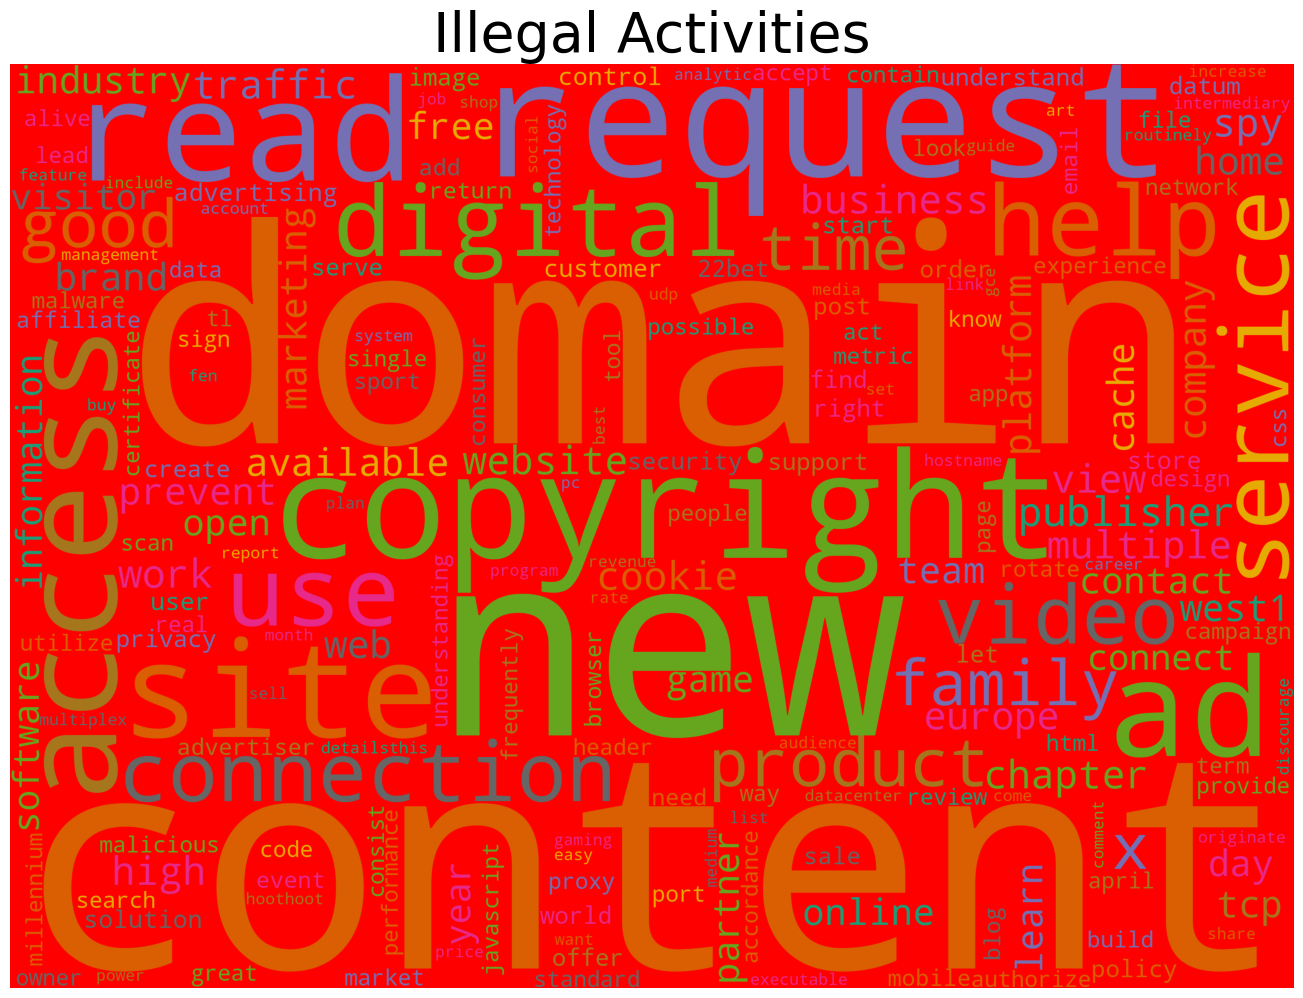

In [45]:


plt.figure(figsize=(20, 12))
subset = df_new1[df_new1['category'] == 'Banner Advertisements']
#font  = "/usr/share/fonts/truetype/freefont/FreeMono.ttf"
text = subset.words.values
word_cloud = WordCloud(stopwords=STOPWORDS, background_color='red', colormap='Dark2', collocations=False, width=2500, height=1800).generate(" ".join(text))

plt.axis('off')
plt.title("Illegal Activities",fontsize=40)
plt.imshow(word_cloud)